In [2]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from finance import *

import warnings
warnings.filterwarnings('ignore')

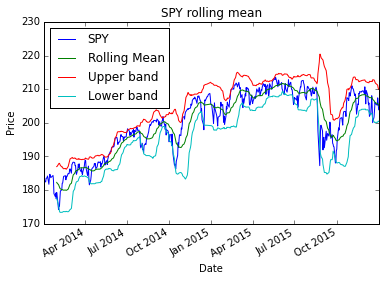

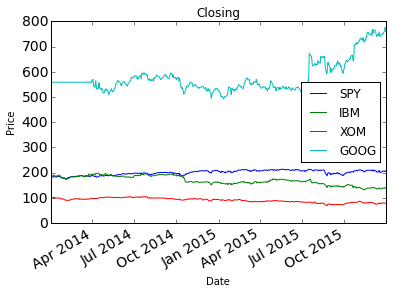

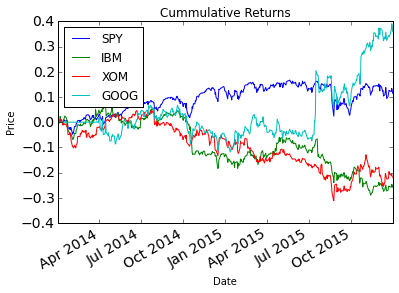

In [11]:
def rolling_average():
    start='2014-01-01'
    end='2015-12-31'
    dates=pd.date_range(start,end)
    df1=get_data(['IBM','XOM','GOOG'],dates)
    mean = get_rolling_mean(df1,20)
    std = get_rolling_std(df1,20)
    upper_band,lower_band = get_bands(mean,std)
    df_cum=compute_cumulative_returns(df1)
    plot_rolling(df1,mean,upper_band,lower_band)
    plot_data(df1,title="Closing")
    plot_data(df_cum,title="Cummulative Returns")
    plt.show()
    
rolling_average()

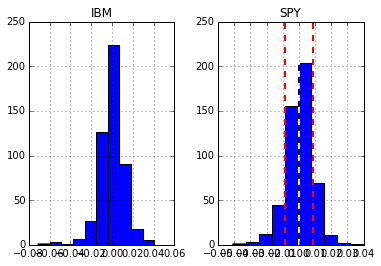

In [23]:
def plot_historigram():
    start='2014-01-01'
    end='2015-12-31'
    dates=pd.date_range(start,end)
    df1=get_data(['IBM'],dates)
    df_daily=compute_daily_returns(df1)
    mean= df_daily['SPY'].mean()
    std= df_daily['SPY'].std()
    df_daily.hist()
    plt.axvline(mean,color='w',linestyle='dashed',linewidth=2)
    plt.axvline(-std,color='r',linestyle='dashed',linewidth=2)
    plt.axvline(std,color='r',linestyle='dashed',linewidth=2)
    plt.show()
    
plot_historigram()

           SPY       IBM       XOM      GOOG
SPY   1.000000  0.620094  0.674818  0.539044
IBM   0.620094  1.000000  0.473373  0.385666
XOM   0.674818  0.473373  1.000000  0.317306
GOOG  0.539044  0.385666  0.317306  1.000000


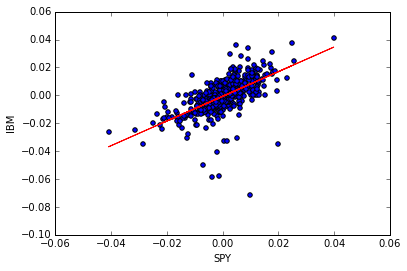

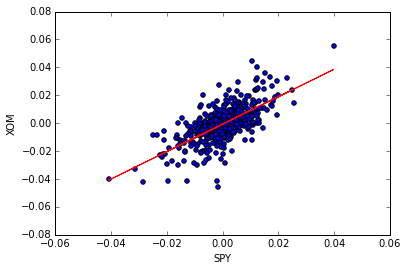

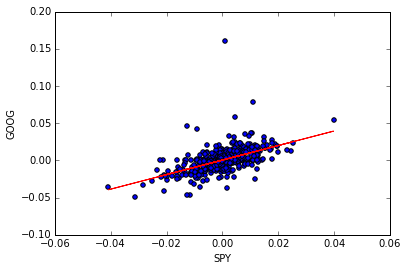

In [8]:
def compare_scatter_plots():
    start='2014-01-01'
    end='2015-12-31'
    dates=pd.date_range(start,end)
    df1=get_data(['IBM','XOM','GOOG'],dates)
    df_daily_1=compute_daily_returns(df1)
    df_daily_1.ffill(inplace=True)
    df_daily_1.bfill(inplace=True)
    print(df_daily_1.corr(method='pearson'))    
    make_scatter_plot(df_daily_1,"SPY","IBM")
    make_scatter_plot(df_daily_1,"SPY","XOM")
    make_scatter_plot(df_daily_1,"SPY","GOOG")

    plt.show()
compare_scatter_plots()

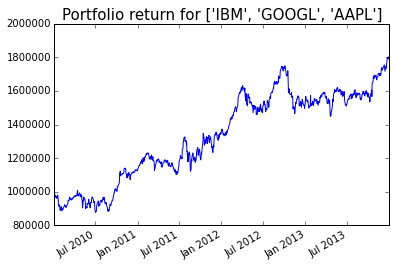

In [37]:
def portfolio_return():
    start='2010-01-01'
    end='2013-12-31'
    dates=pd.date_range(start,end)
    symbols=['IBM','GOOGL','AAPL']
    allocs=[0.4,0.4,0.2]
    start_val=1000000
    df1=get_data(symbols,dates)

    del(df1['SPY'])
    df_norm=normalize(df1)
    df_alloced=df_norm.mul(allocs,axis='columns')
    pos_val=df_alloced*start_val
    port_val=pos_val.sum(axis=1)
    port_val.plot()
    plt.title("Portfolio return for {}".format(symbols),fontsize=15)
    plt.show()
    
portfolio_return()